## How to Use iPython Widgets in A Jupyter Notebook

**Author:** Becky Vandewalle (rcv3@illinois.edu)
<br>**Created:** May 10, 2021
<br>**Last Updated:** May 19, 2021

This notebook introduces iPython widgets and demonstrates simple ways to use them.

### Contents
- [Imports](#import)
- [What is a widget?](#what_is)
- [Common widget types](#common)
- [Handling simple widget events](#simple_event) - skip to here if you are familiar with available widgets
- [Using Widgets with Folium Maps](#folium)

<a id="import"></a>
### Imports

**Important!** You must run the next cell so that all the code examples in this notebook work.

In [1]:
# import required libraries
import ipywidgets as widgets
import matplotlib.pyplot as plt

<a id="what_is"></a>
### What is a widget?

A widget is an object that can be used to get information to or from someone who is using a Jupyter notebook without requiring them to insert or change code in a code cell. Some common widgets are buttons, sliders, and text boxes. This type of object is also called an "event handler", because it is an object that does something when an event, such as a mouse click or pressing a key, happens.

This is a simple overview of some common widgets. For more detailed information, refer to documentation [here](https://ipywidgets.readthedocs.io/en/latest/index.html). Some of the examples in this tutorial are based off an widget introduction found at https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html.

#### Simple widget examples

You can see a simple widget by running the next code cell. The first line creates a widget and the second line displays it. Click on the slider's circle and drag it. What happens to the number on the right when you do this?

In [2]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

Now that we have a widget object, `w`, we can print the value:

In [3]:
w.value

0

Note that when if you display the value and then change the slider the printed value does not also change. However, you can display dynamic text by linking the slider widget to a text widget as shown below. 

In [4]:
s = widgets.IntSlider()
t = widgets.FloatText()
display(s, t)

wlink = widgets.jslink((s, 'value'), (t, 'value'))

IntSlider(value=0)

FloatText(value=0.0)

Notice that we have used `value` twice now. We can access it and other widget attributes through a list of keys that each widget has:

In [5]:
print([i for i in w.keys])

['_dom_classes', '_model_module', '_model_module_version', '_model_name', '_view_count', '_view_module', '_view_module_version', '_view_name', 'continuous_update', 'description', 'description_tooltip', 'disabled', 'layout', 'max', 'min', 'orientation', 'readout', 'readout_format', 'step', 'style', 'value']


We can use these keys to pass information to a widget when creating it as in the below example. If you disable a widget the value will not be able to be changed by interacting directly with the widget.

In [6]:
tx = widgets.Text(value='This is some text!', disabled=True)
wd = widgets.IntSlider(value=29, disabled=True)
display(tx, wd)

Text(value='This is some text!', disabled=True)

IntSlider(value=29, disabled=True)

Even if a widget is disabled, however, the value can be changed programatically by assigning a different number to the widget value. 

In [7]:
wd.value=30
wd.value

30

Note that you can close a widget by calling `.close()`. This hides the widget but you can still access the widget's attirbutes.

In [8]:
wd.close()
wd.value

30

<a id="common"></a>
### Common widget types

Here a few different common types of widgets will be displayed with some important values set. You can base new widgets off of these examples. For more details of available widgets, see the [widget list here](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html).

One of the most important types of widgets is a basic button. It can be clicked, although nothing will happen until some code is linked to the button.

In [9]:
cb = widgets.Button(description='Click the button')

display(cb)

Button(description='Click the button', style=ButtonStyle())

A slider is commonly used for numeric input.

In [10]:
nsa = widgets.IntSlider(value=3, min=0, max=9, step=3, description='Slider', readout=False)
nsb = widgets.FloatSlider(value=3, min=0, max=9, step=3)
nsc = widgets.FloatSlider(value=3, min=0, max=9, step=3, orientation='vertical', readout_format='.1f')

display(nsa, nsb, nsc)

IntSlider(value=3, description='Slider', max=9, readout=False, step=3)

FloatSlider(value=3.0, max=9.0, step=3.0)

FloatSlider(value=3.0, max=9.0, orientation='vertical', readout_format='.1f', step=3.0)

Generally speaking, `Int` and `Float` can be used in the same place to specify the type of number wanted.

In [11]:
nsd = widgets.IntRangeSlider(value=[1, 2], min=0, max=10)
nse = widgets.FloatRangeSlider(value=[6, 9], min=0, max=10)

display(nsd, nse)

IntRangeSlider(value=(1, 2), max=10)

FloatRangeSlider(value=(6.0, 9.0), max=10.0)

Progress bars can also be very hand.

In [12]:
pba = widgets.FloatProgress(value=6.5, min=0, max=10.0,
                      style={'bar_color': '#eeaa00'})

display(pba)

FloatProgress(value=6.5, max=10.0, style=ProgressStyle(bar_color='#eeaa00'))

Sometimes it can be easier to select a number from a box.

In [13]:
nta = widgets.BoundedIntText(value=9, min=7, max=10)
ntb = widgets.IntText(value=9)
display(nta, ntb)

BoundedIntText(value=9, max=10, min=7)

IntText(value=9)

Users can input a true or false value with a button or check box. The Valid widget is an easy way to indicate if input is valid or invalid.

In [14]:
ba = widgets.ToggleButton(value=False, description='Toggle!', tooltip="click to change")
bb = widgets.Checkbox(value=False, description="Check box")
bc = widgets.Valid(value=True, description='Is it valid?')
bd = widgets.Valid(value=False, description='Is it valid?', readout="")

display(ba, bb, bc, bd)

ToggleButton(value=False, description='Toggle!', tooltip='click to change')

Checkbox(value=False, description='Check box')

Valid(value=True, description='Is it valid?')

Valid(value=False, description='Is it valid?', readout='')

It is also common to select an option from a set of defined options.

In [15]:
pa = widgets.Dropdown(options=[2, 4, 6, 8], value=6, description='Pick one:')
pb = widgets.Dropdown(options=[('Cat', 1), ('Dog', 2), ('Hen', 3)], value=3, description='Pick one:')
pc = widgets.RadioButtons(options=['Cat', 'Dog', 'Hen'])
pd = widgets.ToggleButtons(options=['Cat', 'Dog', 'Hen'])
pe = widgets.Select(options=['Select one', 'Cat', 'Dog', 'Hen'], value='Select one')
pf = widgets.SelectMultiple(options=['Select many', 'Cat', 'Dog', 'Hen'])

display(pa, pb, pc, pd, pe, pf)

Dropdown(description='Pick one:', index=2, options=(2, 4, 6, 8), value=6)

Dropdown(description='Pick one:', index=2, options=(('Cat', 1), ('Dog', 2), ('Hen', 3)), value=3)

RadioButtons(options=('Cat', 'Dog', 'Hen'), value='Cat')

ToggleButtons(options=('Cat', 'Dog', 'Hen'), value='Cat')

Select(options=('Select one', 'Cat', 'Dog', 'Hen'), value='Select one')

SelectMultiple(options=('Select many', 'Cat', 'Dog', 'Hen'), value=())

It is also often necessicary to input text.

In [16]:
ta = widgets.Text(value='Hello!')
tb = widgets.Textarea(value='Hello! Type something longer here!')

display(ta, tb)

Text(value='Hello!')

Textarea(value='Hello! Type something longer here!')

There are several more powerful widgets that you might have a certain use for, such as the `HTML`, `HTML Math`, `Image`, `Output`, `Play`, or `File Upload` widgets which you can check out [here](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#HTML). Two that might be useful for geospatial data are the `Date Picker` and `Color Picker` widgets, which are shown below.

In [17]:
dpa = widgets.DatePicker() # warning, does not work in the Safari browser

display(dpa)

DatePicker(value=None)

In [18]:
cpa = widgets.ColorPicker(value='orange') 

display(cpa)

ColorPicker(value='orange')

<a id="simple_event"></a>
### Handling simple widget events

In this section some very basic widget events will be demonstrated, showing some of the ways you can use data from widgets.

Generally there are two techniques that you can use to gather infirmation from widgets:
1. Allow choices to be made freely, but save values when an action is taken (such as a `submit` button is pressed)
2. Constantly update values as they are changed

#### Record values on submit

This shows a simple example of a way to have something happen if you click a button.

In [19]:
seva = widgets.FloatSlider(value=3, min=0, max=9, step=1)
sevb = widgets.Button(description='Click to submit', style=widgets.ButtonStyle(button_color='orange'))
soutwidget = widgets.Output()

def run_on_button_clicked(button):
    print("You clicked: slider: ", str(seva.value))

sevb.on_click(run_on_button_clicked)
display(seva, sevb, soutwidget)

FloatSlider(value=3.0, max=9.0, step=1.0)

Button(description='Click to submit', style=ButtonStyle(button_color='orange'))

Output()

This example is slightly more complex, but works similarly to the example above.

In [20]:
eva = widgets.FloatSlider(value=3, min=0, max=9, step=1)
evb = widgets.ToggleButtons(options=['Cat', 'Dog', 'Hen'])
evc = widgets.Text()
evd = widgets.Button(description='Click to submit', style=widgets.ButtonStyle(button_color='orange'))
eve = widgets.Button(description='Click to clear', style=widgets.ButtonStyle(button_color='lightblue'))

outplot = widgets.Output()
outwidget = widgets.Output(layout={'border': '1px solid black'})

with outplot:
    plt.figure(figsize=(2, 2))
    plt.scatter((0, 1, 0.5), (0, 0, 1), color = "red")
    plt.show()

def run_on_button_clicked(button):
    with outwidget:
        outwidget.clear_output(wait=False)
        print("You clicked:")
        print("\tslider: ", str(eva.value))
        print("\ttoggle: ", str(evb.value))
        print("\ttext: ", str(evc.value))
    with outplot:
        outplot.clear_output()
        plt.figure(figsize=(2, 2))
        plt.scatter((0, 1, 0.5), (0, 0, 1), color = "blue")
        plt.show()
        
def clear_out(button):
    outwidget.clear_output()
    with outplot:
        outplot.clear_output()
        plt.figure(figsize=(2, 2))
        plt.scatter((0, 1, 0.5), (0, 0, 1), color = "red")
        plt.show()

evd.on_click(run_on_button_clicked)
eve.on_click(clear_out)


display(outplot, eva, evb, evc, evd, eve, outwidget)

Output()

FloatSlider(value=3.0, max=9.0, step=1.0)

ToggleButtons(options=('Cat', 'Dog', 'Hen'), value='Cat')

Text(value='')

Button(description='Click to submit', style=ButtonStyle(button_color='orange'))

Button(description='Click to clear', style=ButtonStyle(button_color='lightblue'))

Output(layout=Layout(border='1px solid black'))

#### Constantly update values

In each of the above examples, nothing happened unless you clicked a button. This is useful for forms and inputs that require some form of error checking before incorporating into your program. However, there is another way to get input that is good for instant feedback.

`%matplotlib notebook` is a special function that allows the figure to be updated when notebook values change.

<IPython.core.display.Javascript object>


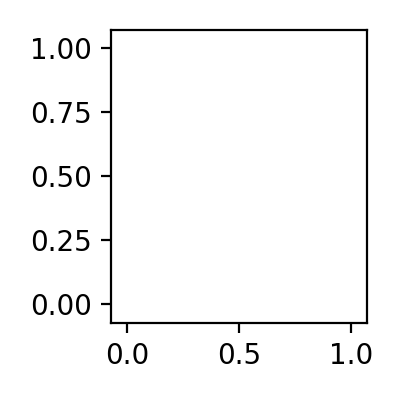

FloatSlider(value=0.0, description='R', max=1.0)

FloatSlider(value=0.0, description='G', max=1.0)

FloatSlider(value=0.0, description='B', max=1.0)

In [21]:
%matplotlib notebook

rslid = widgets.FloatSlider(value=0, min=0, max=1, description="R")
gslid = widgets.FloatSlider(value=0, min=0, max=1, description="G")
bslid = widgets.FloatSlider(value=0, min=0, max=1, description="B")


fig = plt.figure(figsize=(2, 2))
ax = fig.add_subplot(1,1,1)
ax.scatter((0, 1, 0.5), (0, 0, 1), color = [[1, 1, 1]])
plt.tight_layout()
plt.show()
    
def slider_change(slider):
    ax.clear()
    ax.scatter((0, 1, 0.5), (0, 0, 1), color = [[rslid.value, gslid.value, bslid.value]])
    plt.show()
    
rslid.observe(slider_change, names='value')
gslid.observe(slider_change, names='value')
bslid.observe(slider_change, names='value')

display(rslid, gslid, bslid)

<a id="folium"></a>
### Using Widgets with Folium Maps

The last example is a quick demonstration of using widgets to set zoom levels for a pair of maps.

In [22]:
import folium
import branca

In [23]:
f = branca.element.Figure()

d1 = f.add_subplot(1, 2, 1)
d2 = f.add_subplot(1, 2, 2)

wc = folium.Map([0, 0], tiles='stamenwatercolor', zoom_start=1, max_bounds=True)
osm = folium.Map([0, 0], tiles='OpenStreetMap', zoom_start=1, max_bounds=True)
wc.fit_bounds([[39.881832, -89.623177], [42.881832, -85.623177]])
osm.fit_bounds([[39.881832, -89.623177], [42.881832, -85.623177]])

d1.add_child(wc)
d2.add_child(osm);

In [24]:
minlatslider = widgets.BoundedFloatText(value=39.8818, min=-90, max=90, step=0.00005, description='min lat')
minlonslider = widgets.BoundedFloatText(value=-89.6231, min=-180, max=180, step=0.00005, description='min lon')
maxlatslider = widgets.BoundedFloatText(value=42.8818, min=-90, max=90, step=0.00005, description='max lat')
maxlonslider = widgets.BoundedFloatText(value=-85.6231, min=-180, max=180, step=0.00005, description='max lon')
settovaluebutton = widgets.Button(description='Set Zoom Level')
resetbutton = widgets.Button(description='Reset Zoom Level')
outmap = widgets.Output()


def set_zoom(button):
    outmap.clear_output()
    wc.fit_bounds([[minlatslider.value, minlonslider.value], [maxlatslider.value, maxlonslider.value]])
    osm.fit_bounds([[minlatslider.value, minlonslider.value], [maxlatslider.value, maxlonslider.value]])
    with outmap:
        display(f)
    
def clear_zoom(button):
    outmap.clear_output()
    wc.fit_bounds([[39.881832, -89.623177], [42.881832, -85.623177]])
    osm.fit_bounds([[39.881832, -89.623177], [42.881832, -85.623177]])
    with outmap:
        display(f)
    
settovaluebutton.on_click(set_zoom)
resetbutton.on_click(clear_zoom)

with outmap:
    display(f)

left_box = widgets.VBox([minlatslider, maxlatslider])
right_box = widgets.VBox([minlonslider, maxlonslider])
button_box = widgets.VBox([settovaluebutton, resetbutton])

display(outmap)
display(widgets.HBox([left_box, right_box, button_box]))

Output()